In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci.keys())
print(boston_nieruchomosci.DESCR)


Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibili

In [ ]:
print('Przykładowe wartości cech:\n', boston_nieruchomosci.data[:3])
print('Przykładowe kwoty: ', boston_nieruchomosci.target[:3])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns

# konwersja na obiekt pandas.DataFrame
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

# wykres
sns.pairplot(boston_df)
plt.show()

In [ ]:
# Dużo zmiennych... na początek spróbujmy z jedną
l_pokoi = boston_nieruchomosci['data'][:, np.newaxis, 5]
plt.scatter(l_pokoi, boston_nieruchomosci['target'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(l_pokoi, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [ ]:
# dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

cv_score_r2 = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_score_r2)

# używamy innej metryki 
# dokumentacja:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# ...i jeszcze innej
cv_score_mse = cross_val_score(linreg, l_pokoi, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

In [ ]:
# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.

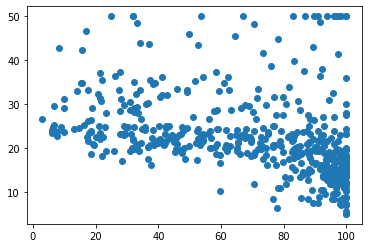

Metryka domyślna:  0.1563805353115182
Współczynniki regresji:
 [-0.11609412]
[ 0.04495477  0.05074154 -0.69817202 -0.06274528 -1.21254137]


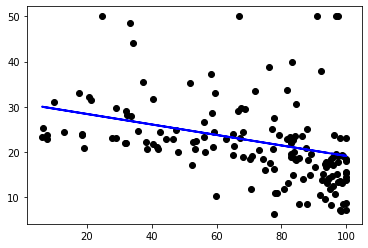

In [4]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.

# Kopiuj-wklej z przykładu:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

# Dużo zmiennych... na początek spróbujmy z jedną
wiek = boston_nieruchomosci['data'][:, np.newaxis, 6]
plt.scatter(wiek, boston_nieruchomosci['target'])
plt.show()

# Więcej kopiuj-wklej:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(wiek, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka i współczynniki regresji
print('Metryka domyślna: ', linreg.score(X_test, y_test))
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

# walidacja krzyzowa
from sklearn.model_selection import cross_val_score
cv_score_r2 = cross_val_score(linreg, wiek, boston_nieruchomosci.target, cv=5, scoring='r2')
print('Walidacja krzyzowa: ' + cv_score_r2)

